# Otter populations in california

Project 1

Gail Romer and Mellie Zito

In [16]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

from pandas import read_csv

In [17]:
filename = 'Otterdata.csv'
tables = read_csv(filename, header=0, index_col=0, decimal='M');

In [18]:
pup_total = tables.pups
otter_total = tables.total
mature_total = otter_total - pup_total;

In [19]:
pofo = 0.4 #percentage of female otters - may equal this out later (ie 50:50 ratio) no real life support of this number
pomo = 1 - pofo 

female_pups = pup_total * pofo
male_pups = pup_total * pomo

f_mature = (otter_total - pup_total) * pofo
m_mature = (otter_total - pup_total) * pomo;

In [35]:
def plot_results(male_pups, female_pups, f_mature, m_mature, timeseries, timeseries2, title):
    """Plot the estimates and the model.
    
    total: TimeSeries of population estimates
    timeseries: TimeSeries of simulation results
    title: string
    """
#     plot(female_pups, ':', label='f pups')
#     plot(male_pups, ':', label='m pups')
#     plot(f_mature, ':', label='f mature')
#     plot(m_mature, ':', label='m mature')
    
    plot(female_pups+male_pups, ':', label='pups')
   
    plot(f_mature+m_mature, ':', label='mature')
    
    
#     if len(timeseries):
#         plot(timeseries, color='gray', label='model_mature')
#     if len(timeseries2):
#         plot(timeseries, color='gray', label='model_pups')
    
    plot(timeseries, "--", color='black', label='model_mature')
    plot(timeseries2, color='gray', label='model_pups')
    
    decorate(xlabel='Year', 
             ylabel='Otter Population',
             title=title)

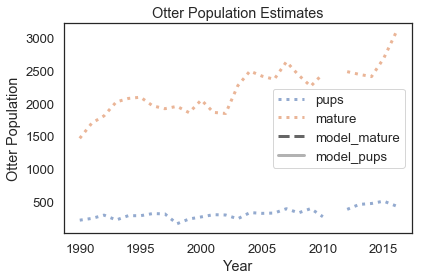

In [36]:
empty = TimeSeries()
empty2 = TimeSeries()
plot_results(male_pups, female_pups, f_mature, m_mature, empty, empty2, 'Otter Population Estimates')

### At what point of less female otters will birth rates be low enough that otter populations die out in the next 20 years in california?

Although otter populations are on the rise now, what effect would a sudden disease have (in this case affecting pups). Relevant
to see how stable otter populations are and to prevent otters from dying out in california

Old question: How would total otter population increase and decrease if otter pup populations were less consistent year to year?

[To remove later:

Parameters: birth and death rates of otters in california

State (from online data table): populations of otter pups and total otters

Metrics: pup and total otter population]

[Description here of question and what's wanted]

### Model

In [37]:
init_f_pups = get_first_value(female_pups)
init_m_pups = get_first_value(male_pups)
init_f_mature = get_first_value(f_mature)
init_m_mature = get_first_value(m_mature)



init_state = State(f_pups=init_f_pups, m_pups=init_m_pups, f_mature=init_f_mature, m_mature=init_m_mature)

,values
f_pups,85.6
m_pups,128.4
f_mature,586.4
m_mature,879.6


Birth rate per female is < 1 per year






             https://seaworld.org/animal-info/animal-infobooks/otters/birth-and-care-of-young                
                
Sea otter gestation range from four to nine months, with an average of six months.
Sea otters give birth throughout the year, with peaks in late May and June for Alaska otters, and March and September for California otters.
Sea otters are capable of giving birth every year, but females usually experience much longer birth intervals.
             https://www.biologicaldiversity.org/species/mammals/sea_otter/natural_history.html
                
                
Female otters reach sexual maturity at three years of age, and males follow at five to six years
Male sea otters live between 10 and 15 years, while females live slightly longer, from 15 to 20 years

In [80]:

f_birth_rate = .035
m_birth_rate = f_birth_rate 

maturation_rate = .16
f_death_rate = .0008 # female vs male death rate subject to change, possibly sweep
m_death_rate = .0008
t_0 = 1990
t_end = 2015
                
system = System(f_birth_rate = f_birth_rate, #Lets figure out how birth rate relates to F pop
                m_birth_rate = m_birth_rate, #Lets figure out how birth rate relates to F pop
                maturation_rate = maturation_rate,
                f_death_rate = f_death_rate, # female vs male death rate subject to change, possibly sweep
                m_death_rate = m_death_rate, 
                t_0 = t_0,
                t_end = t_end,
                state = init_state)

# system = System(f_birth_rate = .035, #Lets figure out how birth rate relates to F pop
#                 m_birth_rate = .035, #Lets figure out how birth rate relates to F pop
#                 maturation_rate = .16,
#                 f_death_rate = .0008, # female vs male death rate subject to change, possibly sweep
#                 m_death_rate = .0008,
#                 t_0 = 1990,
#                 t_end = 2015,
#                 state = init_state)

,values
f_birth_rate,0.035
m_birth_rate,0.035
maturation_rate,0.16
f_death_rate,0.0008
m_death_rate,0.0008
t_0,1990
t_end,2015
state,f_pups 85.6 m_pups 128.4 f_mature ...


In [81]:
# def update_func1(state, t, system):
    
    
#     f_births = system.f_birth_rate * state.f_mature
    
#     m_births = system.m_birth_rate * state.f_mature
    
#     f_maturlings = system.maturation_rate * state.f_pups
    
#     m_maturlings = system.maturation_rate * state.m_pups
        
#     f_deaths = system.f_death_rate * state.f_mature
    
#     m_deaths = system.m_death_rate * state.m_mature
    
#     f_otters = state.f_mature - f_deaths + f_maturlings
    
#     m_otters = state.m_mature - m_deaths + m_maturlings
    
#     f_pups = state.f_pups + f_births - f_maturlings - system.m_death_rate
    
#     m_pups = state.m_pups + m_births - m_maturlings - system.m_death_rate
    
    
#     return State(f_pups=f_pups, m_pups=m_pups, f_mature=f_otters, m_mature=m_otters)

def update_func1(state, t, system):
    
    
    f_births = system.f_birth_rate * state.f_mature
    
    m_births = system.m_birth_rate * state.f_mature
    
    f_maturlings = system.maturation_rate * state.f_pups
    
    m_maturlings = system.maturation_rate * state.m_pups
        
    f_deaths = death_rate * state.f_mature
    
    m_deaths = system.m_death_rate * state.m_mature
    
    f_otters = state.f_mature - f_deaths + f_maturlings
    
    m_otters = state.m_mature - m_deaths + m_maturlings
    
    f_pups = state.f_pups + f_births - f_maturlings - system.m_death_rate
    
    m_pups = state.m_pups + m_births - m_maturlings - system.m_death_rate
    
    
    return State(f_pups=f_pups, m_pups=m_pups, f_mature=f_otters, m_mature=m_otters)

### Results

### Interpretation

### For Later:

In [82]:
state = update_func1(init_state, system.t_0, system)

,values
f_pups,92.42720
m_pups,128.37920
f_mature,599.62688
m_mature,899.44032


In [83]:
# def run_simulation(system, update_func):
#     """Simulate the system using any update function.
    
#     init: initial State object
#     system: System object
#     update_func: function that computes the population next year
    
#     returns: TimeSeries
#     """
#     results_mature = TimeSeries()
#     results_pups = TimeSeries()
    
#     state = system.state
#     results_mature[system.t_0] = state.f_mature + state.m_mature
#     results_pups[system.t_0] = state.f_pups + state.m_pups
    
#     for t in linrange(system.t_0, system.t_end):
#         state = update_func(state, t, system)
#         results_mature[t+1] = state.f_mature + state.m_mature
#         results_pups[t+1] = state.f_pups + state.m_pups
#     return results_mature, results_pups


def run_simulation(system, death_rate, update_func):
    """Simulate the system using any update function.
    
    init: initial State object
    system: System object
    update_func: function that computes the population next year
    
    returns: TimeSeries
    """
    results_mature = TimeSeries()
    results_pups = TimeSeries()
    
    state = system.state
    results_mature[system.t_0] = state.f_mature + state.m_mature
    results_pups[system.t_0] = state.f_pups + state.m_pups
    
    for t in linrange(system.t_0, system.t_end):
        state = update_func(state, t, system)
        results_mature[t+1] = state.f_mature + state.m_mature
        results_pups[t+1] = state.f_pups + state.m_pups
    return results_mature, results_pups

In [84]:
results_mature = run_simulation(system, update_func1)[0];
results_pups = run_simulation(system, update_func1)[1];

# print(results_pups)
# print(results_mature)

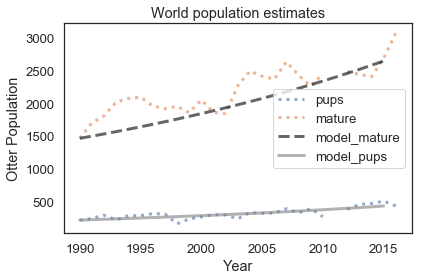

In [85]:
plot_results(male_pups, female_pups, f_mature, m_mature, 
             results_mature, 
             results_pups, 'World population estimates')

In [ ]:
death_rate_array = linspace(0, 1, 11)

sweep_pups = SweepSeries()
sweep_mature = SweepSeries()

for death_rate in death_rate_array:
    state = run_simulation(death_rate, p2, num_steps)
    sweep[p1] = state.olin_empty

### Copied Code



#### How to take in data tables for birth and death rates and trends, then plot that data



In [48]:
filename = 'data/World_population_estimates.html'
#replace with found data table
tables = read_html(filename, header=0, index_col=0, decimal='M')
table2 = tables[2]
table2.columns = ['census', 'prb', 'un', 'maddison', 
                  'hyde', 'tanton', 'biraben', 'mj', 
                  'thomlinson', 'durand', 'clark']

In [ ]:
def plot_results(census, un, timeseries, title):
    """Plot the estimates and the model.
    
    census: TimeSeries of population estimates
    un: TimeSeries of population estimates
    timeseries: TimeSeries of simulation results
    title: string
    """
    plot(census, ':', label='US Census')
    plot(un, '--', label='UN DESA')
    if len(timeseries):
        plot(timeseries, color='gray', label='model')
    
    decorate(xlabel='Year', 
             ylabel='World population (billion)',
             title=title)

In [ ]:
un = table2.un / 1e9
census = table2.census / 1e9
empty = TimeSeries()
plot_results(census, un, empty, 'World population estimates')

#### Then it goes into making the model:

### System objects

We can rewrite the code from the previous chapter using system objects.

In [ ]:
t_0 = get_first_label(census)
t_end = get_last_label(census)
elapsed_time = t_end - t_0

p_0 = get_first_value(census)
p_end = get_last_value(census)
total_growth = p_end - p_0

annual_growth = total_growth / elapsed_time

system = System(t_0=t_0, 
                t_end=t_end,
                p_0=p_0,
                annual_growth=annual_growth)

And we can encapsulate the code that runs the model in a function.

In [ ]:
def run_simulation1(system):
    """Runs the constant growth model.
    
    system: System object
    
    returns: TimeSeries
    """
    results = TimeSeries()
    results[system.t_0] = system.p_0
    
    for t in linrange(system.t_0, system.t_end):
        results[t+1] = results[t] + system.annual_growth
    
    return results

We can also encapsulate the code that plots the results.

In [ ]:
def plot_results(census, un, timeseries, title):
    """Plot the estimates and the model.
    
    census: TimeSeries of population estimates
    un: TimeSeries of population estimates
    timeseries: TimeSeries of simulation results
    title: string
    """
    plot(census, ':', label='US Census')
    plot(un, '--', label='UN DESA')
    plot(timeseries, color='gray', label='model')
    
    decorate(xlabel='Year', 
             ylabel='World population (billion)',
             title=title)

In [ ]:
results = run_simulation1(system)
plot_results(census, un, results, 'Constant growth model')

## Proportional model:

In [ ]:
def update_func1(pop, t, system):
    """Compute the population next year.
    
    pop: current population
    t: current year
    system: system object containing parameters of the model
    
    returns: population next year
    """
    #print(t)
    #print(pop)
    births = system.birth_rate * pop
    deaths = system.death_rate * pop
    return pop + births - deaths

In [ ]:
def run_simulation(system, update_func):
    """Simulate the system using any update function.
    
    system: System object
    update_func: function that computes the population next year
    
    returns: TimeSeries
    """
    results = TimeSeries()
    results[system.t_0] = system.p_0
    
    for t in linrange(system.t_0, system.t_end):
        results[t+1] = update_func(results[t], t, system)
        
    return results

In [ ]:
t_0 = get_first_label(census)
t_end = get_last_label(census)
p_0 = census[t_0]

system = System(t_0=t_0, 
                t_end=t_end,
                p_0=p_0,
                birth_rate=0.027,
                death_rate=0.01)

In [ ]:
results = run_simulation(system, update_func1)
plot_results(census, un, results, 'Proportional model, factored')

### Combines Birth and Death Rates

In [ ]:
def run_simulation2(system):
    """Run a model with proportional birth and death.
    
    system: System object
    
    returns: TimeSeries
    """
    results = TimeSeries()
    results[system.t_0] = system.p_0
    
    for t in linrange(system.t_0, system.t_end):
        births = system.birth_rate * results[t]
        deaths = system.death_rate * results[t]
        results[t+1] = results[t] + births - deaths
        
    return results

system.death_rate = 0.01
system.birth_rate = 0.027

results = run_simulation2(system)
plot_results(census, un, results, 'Proportional model')
savefig('figs/chap03-fig03.pdf')

In [ ]:
def update_func2(pop, t, system):
    """Compute the population next year.
    
    pop: current population
    t: current year
    system: system object containing parameters of the model
    
    returns: population next year
    """
    net_growth = system.alpha  * pop
    return pop + net_growth

In [ ]:
system.alpha = system.birth_rate - system.death_rate

results = run_simulation(system, update_func2)
plot_results(census, un, results, 'Proportional model, combined birth and death')

### Multiple rates:

In [ ]:
def update_func3(pop, t, system):
    """Compute the population next year.
    
    pop: current population
    t: current year
    system: system object containing parameters of the model
    
    returns: population next year
    """
    if t < 1980:
        net_growth = system.alpha1  * pop
    
    if t >= 1980:
        net_growth = system.alpha2 * pop
        
    return pop + net_growth

In [ ]:
system.death_rate1 = 0.01
system.birth_rate1 = 0.027

system.death_rate2 = 0.01
system.birth_rate2 = 0.028

system.alpha1 = system.birth_rate1 - system.death_rate1
system.alpha2 = system.birth_rate2 - system.death_rate2

results = run_simulation(system, update_func3)
plot_results(census, un, results, 'Proportional model, combined birth and death')